# Import Data Set


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=sns.load_dataset("tips")

# Display First 5 rows and Last 5 rows

In [7]:
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
data.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# Rows & Columns

In [9]:
print(data.shape[0]) #Rows
print(data.shape[1]) #Columns

244
7


# Information about Dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# how many weekdays are present in dataset

In [13]:
data.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

# how many dinner and lunches and plot the curve

In [14]:
data["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:>

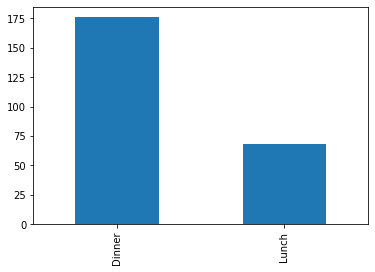

In [15]:
data["time"].value_counts().plot(kind="bar")

# What is the proportion of dinner and lunches in Percent (%)

In [16]:
data["time"].value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

# When does people pay more tips and plot the curve

In [17]:
t=data.groupby("time")["tip"].mean().reset_index()
t

,time,tip
0,Lunch,2.728088
1,Dinner,3.102670


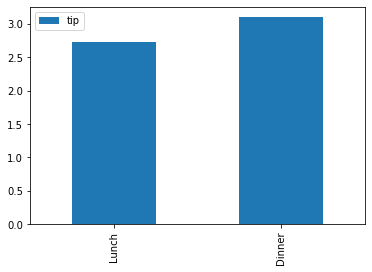

In [18]:
data.groupby("time")["tip"].mean().reset_index().plot.bar()
plt.xticks([0,1],["Lunch","Dinner"])
plt.show()

# Finding the Average of  smoker person will give the tip 

In [19]:
data.groupby("smoker")["tip"].mean().reset_index()

,smoker,tip
0,Yes,3.008710
1,No,2.991854


<AxesSubplot:xlabel='smoker'>

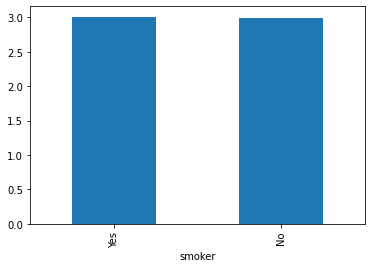

In [20]:
data.groupby("smoker")["tip"].mean().plot.bar()

# Find the Average  tip based on sex column  

In [21]:
data.groupby("sex")["tip"].mean().reset_index()

,sex,tip
0,Male,3.089618
1,Female,2.833448


<AxesSubplot:xlabel='sex'>

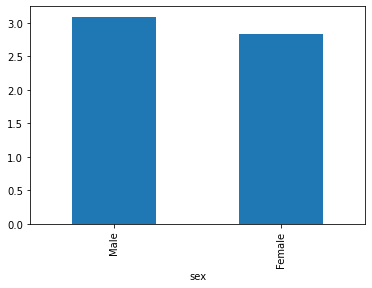

In [22]:
data.groupby("sex")["tip"].mean().plot.bar()

# Finding the average tip based on Day 

In [23]:
data.groupby("day")["tip"].mean().reset_index()

,day,tip
0,Thur,2.771452
1,Fri,2.734737
2,Sat,2.993103
3,Sun,3.255132


<AxesSubplot:xlabel='day'>

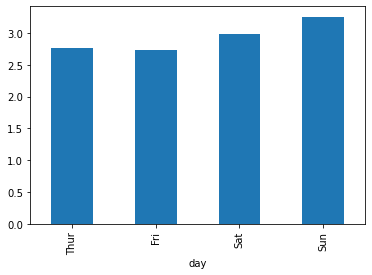

In [24]:
data.groupby("day")["tip"].mean().plot.bar()

# Null Values and plot them

In [25]:
data.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<AxesSubplot:>

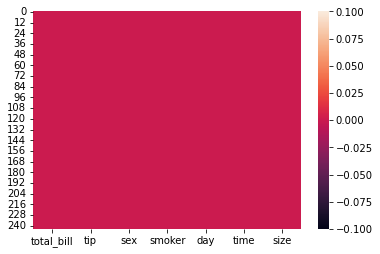

In [26]:
sns.heatmap(data.isna())

# Find skew of total Bill

In [27]:
print(data['total_bill'].skew())

1.1332130376158205


# Find  Kurtosis 

In [31]:
print(data['total_bill'].kurt())

1.2184840156638854


# Percentile 

In [32]:
q1=data['total_bill'].quantile(0.25)
q2=data['total_bill'].quantile(0.5)
q3=data['total_bill'].quantile(0.75)

In [37]:
print(q1,q2,q3)

13.3475 17.795 24.127499999999998


# Interquartile Range

In [33]:
IQR=q3-q1
IQR

10.779999999999998

# Plot Normal Distribution Curve

Text(0.5, 0, 'Total Bill')

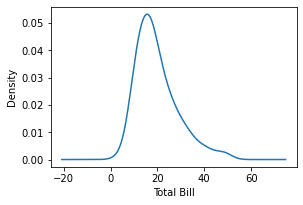

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
data['total_bill'].plot(kind='kde')
plt.xlabel("Total Bill")

# Find Correlation & Covariance


In [40]:
print("The covariances between the numerical variables in the Tips datasets are: \n" ,data.loc[:, ['total_bill','tip','sex','smoker','size']].cov())

print("\n The correlations between the numerical variables in the Tips datasets are: \n" ,data.loc[:, ['total_bill','tip','sex','smoker','size']].corr())


The covariances between the numerical variables in the Tips datasets are: 
             total_bill       tip      size
total_bill   79.252939  8.323502  5.065983
tip           8.323502  1.914455  0.643906
size          5.065983  0.643906  0.904591

 The correlations between the numerical variables in the Tips datasets are: 
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


# Add  a new Column 

In [41]:
data["tips_pot"]=data["tip"]/data["total_bill"]

In [42]:
data

,total_bill,tip,sex,smoker,day,time,size,tips_pot
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# Scatter Plot between total bill and tip 

Text(0.5, 1.0, 'Total bill vs tip')

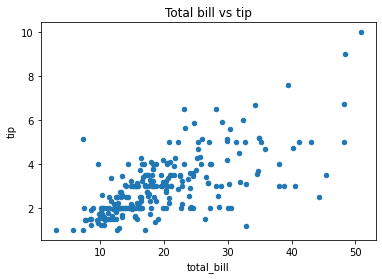

In [44]:
data.plot.scatter(x="total_bill",y="tip")
plt.title("Total bill vs tip")

# "tip given by male and female"

Text(0.5, 1.0, 'tip given by male and female')

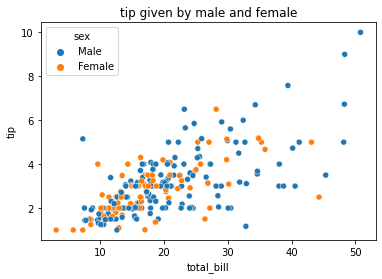

In [45]:
sns.scatterplot(x="total_bill",y="tip",hue="sex",data=data)
plt.title("tip given by male and female")

# "Tip given at Lunch and Dinner"

Text(0.5, 1.0, 'Tip given at Lunch and Dinner')

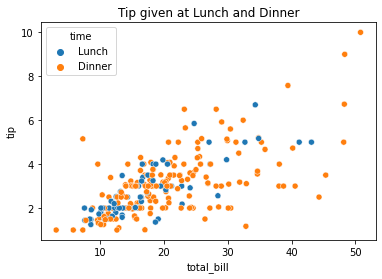

In [46]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=data)
plt.title("Tip given at Lunch and Dinner")

# Tip given by male and female at lunch / Dinner

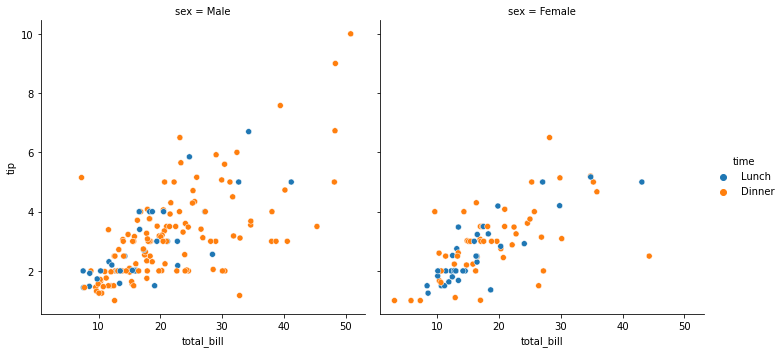

In [47]:
sns.relplot(x="total_bill",y="tip",hue="time",col="sex",data=data)

# Normal Distribution plot of total bill at Lunch/Dinner

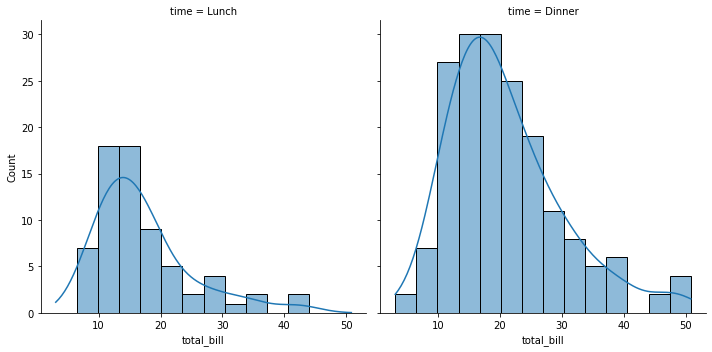

In [48]:
sns.displot(data=data,x="total_bill",col="time",kde=True)

# Normal Distribution plot of Tip at Lunch/Dinner

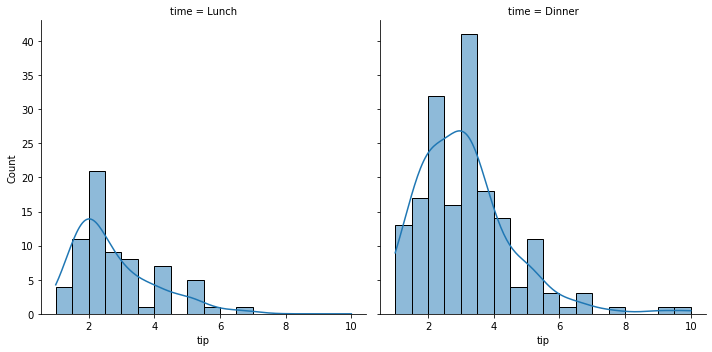

In [49]:
sns.displot(data=data,x="tip",col="time",kde=True)

# Creating Correlation distribution for all numeric variable by sex

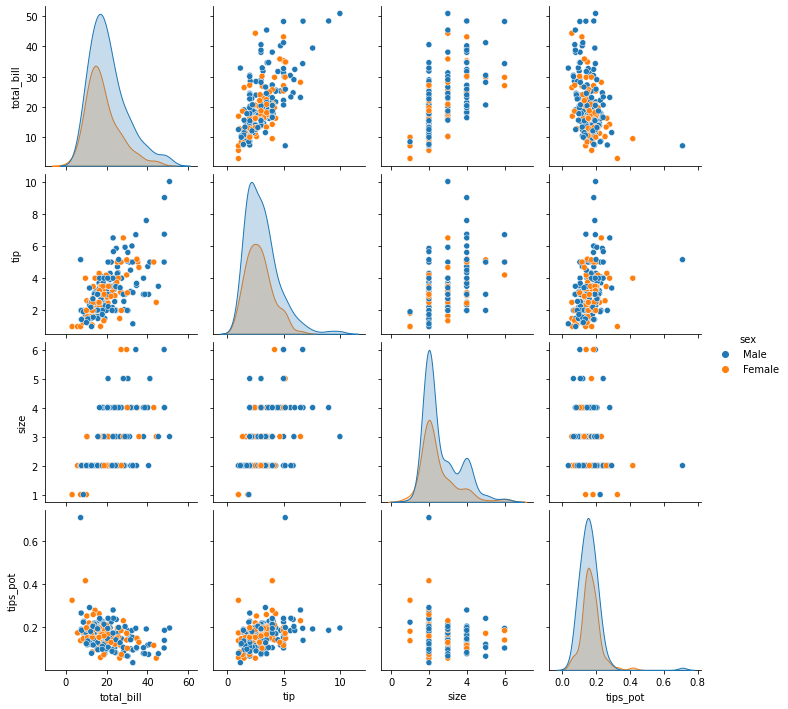

In [53]:
sns.pairplot(data=data,hue="sex")

# Show the correlation and distribution between all numeric columns based on sex

In [54]:
data=data.drop("tips_pot",axis=1)

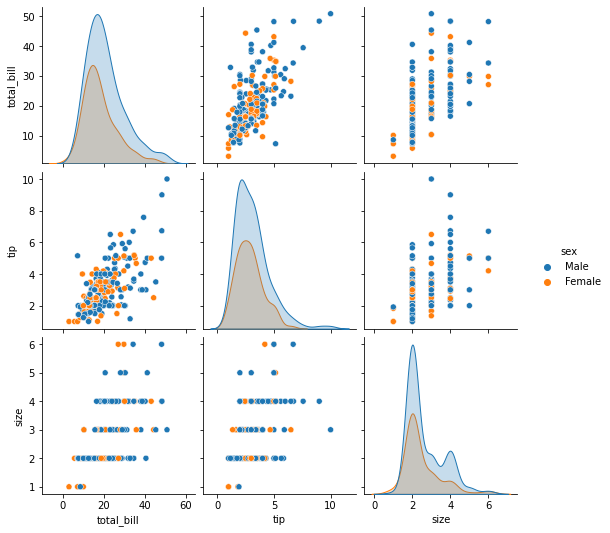

In [55]:
sns.pairplot(data=data,hue="sex")

# Creating Pie Chart and bar Chart of male and female 

In [59]:
data["sex"].value_counts()


Male      157
Female     87
Name: sex, dtype: int64

Text(0, 0.5, 'Count')

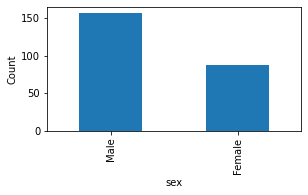

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
data['sex'].value_counts().plot(kind='bar')
plt.xlabel("sex")
plt.ylabel("Count")



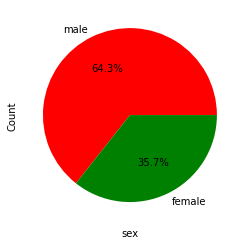

In [65]:
sizes=[157,87]
plt.pie(sizes,labels=["male","female"],autopct='%1.1f%%',colors=["r","g"])
plt.xlabel("sex")
plt.ylabel("Count")
plt.show()